¡Hola, Daniel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.

</div>

Puedes responderme utilizando esto:



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [13]:

data= pd.read_csv('/datasets/Churn.csv')
print(data.shape)
print()
data.info()
print()
print()
print()
print(data.sample(20))


(10000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB



      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo tanto con la carga de librerías y datos como con la exploración inicial de la información.

A partir de la muestra observada del conjunto de datos, se identifica que las columnas RowNumber, CustomerId y Surname no aportan información útil para la predicción, ya que actúan únicamente como identificadores o etiquetas de texto. Por lo tanto, serán eliminadas en la etapa de preprocesamiento.

Por otro lado, las columnas Geography y Gender contienen valores categóricos que deberán ser codificados mediante one-hot encoding, con el fin de que el modelo pueda interpretar correctamente esta información.

Se identificó que la columna Tenure presenta valores faltantes en aproximadamente un 9%–10% de las observaciones.
Dado que esta proporción de datos faltantes no es significativa y la variable es numérica continua, se optó por reemplazar los valores ausentes con la media de la columna.

Este método de imputación mantiene la distribución general de los datos sin introducir sesgos importantes y permite conservar la totalidad de los registros para el entrenamiento del modelo.

Asimismo, las variables numéricas serán escaladas utilizando un scaler (por ejemplo, StandardScaler), lo que permitirá que todas las características tengan una magnitud comparable y evitará que el modelo se sesgue hacia variables con valores más grandes.

Esta preparación forma parte de las buenas prácticas en el procesamiento de datos antes del entrenamiento de modelos de aprendizaje automático.

In [14]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [15]:
data['Tenure']=data['Tenure'].fillna(data['Tenure'].mean())

In [16]:
features = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
target = data['Exited']

In [17]:
scaler = StandardScaler()
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

**Análisis del equilibrio de clases**

Antes de entrenar el modelo, es fundamental examinar la distribución de la variable objetivo Exited, para determinar si las clases están balanceadas o desbalanceadas.

En problemas de churn prediction, es común que la mayoría de los clientes permanezcan en el banco, y solo un porcentaje reducido abandone, lo que puede sesgar al modelo hacia la clase mayoritaria.

Al analizar la distribución de las clases, se podrá decidir si es necesario aplicar técnicas de corrección del desequilibrio, como:

Ajuste de pesos de clase (class_weight='balanced')

Submuestreo o sobremuestreo de las clases (RandomOverSampler, SMOTE, etc.)

Este paso es esencial para asegurar que el modelo aprenda de manera justa ambas categorías y logre un mejor equilibrio entre precision y recall.

Distribución de clases (frecuencia):
0    7963
1    2037
Name: Exited, dtype: int64

Distribución de clases (porcentaje):
0    79.63
1    20.37
Name: Exited, dtype: float64


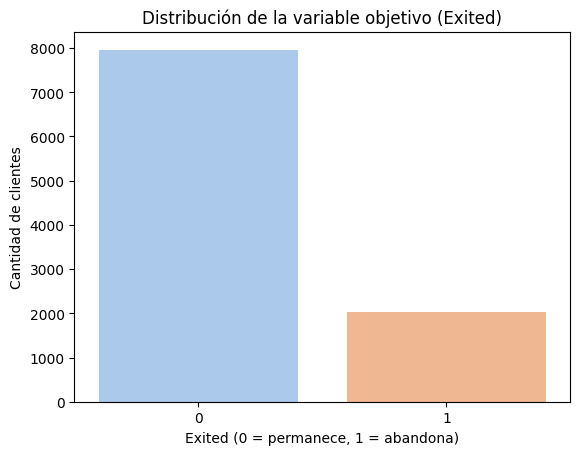

In [18]:
class_counts = target.value_counts()
class_percentages = target.value_counts(normalize=True) * 100

print("Distribución de clases (frecuencia):")
print(class_counts)

print("\nDistribución de clases (porcentaje):")
print(class_percentages)


sns.countplot(x=target, palette="pastel")
plt.title("Distribución de la variable objetivo (Exited)")
plt.xlabel("Exited (0 = permanece, 1 = abandona)")
plt.ylabel("Cantidad de clientes")
plt.show()

Se divide el conjunto de datos en tres subconjuntos: entrenamiento (60 %), validación (20 %) y prueba (20 %) para evaluar el desempeño del modelo de forma adecuada.

In [19]:
features_train, features_ver, target_train, target_ver = train_test_split(features, target, test_size=0.4, random_state=54321, stratify=target)

features_valid, features_trial, target_valid, target_trial = train_test_split(features_ver, target_ver, test_size=0.5, random_state=54321, stratify=target_ver)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo codificando las variables categóricas y dividiendo los datos en los conjuntos de entrenamiento, prueba y validación.
</div>

Se combinan las características y la variable objetivo, y luego se separan las clases mayoritaria y minoritaria según 'Exited'.

In [20]:
train_data= pd.concat([features_train, target_train], axis=1 ) 

majority= train_data[train_data['Exited']==0]
minority= train_data[train_data['Exited']==1]

Se reduce aleatoriamente la clase mayoritaria al tamaño de la minoritaria para equilibrar el conjunto de entrenamiento.

In [21]:
majority_down= resample(majority, replace=False, n_samples= len(minority), random_state=54321)

train_downsampled = pd.concat([majority_down, minority])

features_train_downsampled = train_downsampled.drop(columns=[target_train.name])
target_train_downsampled = train_downsampled[target_train.name]


Se aumenta aleatoriamente la clase minoritaria hasta igualar el tamaño de la clase mayoritaria.

In [22]:
minority_up= resample(minority, replace=True, n_samples=len(majority), random_state=54321 )


train_upsampled = pd.concat([majority, minority_up])


features_train_upsampled = train_upsampled.drop(columns=[target_train.name])
target_train_upsampled = train_upsampled[target_train.name]

***RandomForestClassifier***

In [23]:

best_accuracy = 0
best_est = 0
best_depth = 0
mejor_modelo_normal_RFC = None  

for est in range(10, 102, 10):      # Cantidad de árboles
    for depth in range(1, 11):      # Profundidad máxima
        model_RF = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)
        model_RF.fit(features_train, target_train)
        predictions_valid = model_RF.predict(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions_valid)
        print(f"Accuracy en validación para n_estimators={est}, max_depth={depth}: {accuracy:.3f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_est = est
            best_depth = depth
            mejor_modelo_normal_RFC = model_RF 

best_predictions = mejor_modelo_normal_RFC.predict(features_valid)
best_proba = mejor_modelo_normal_RFC.predict_proba(features_valid)[:, 1] 

precision = precision_score(target_valid, best_predictions)
recall = recall_score(target_valid, best_predictions)
f1 = f1_score(target_valid, best_predictions)
roc_auc = roc_auc_score(target_valid, best_proba)

print(f"\n🔹 Mejor modelo Random Forest normal (mejor_modelo_normal_RFC):")
print(f"Accuracy: {best_accuracy:.3f}")
print(f"n_estimators: {best_est}, max_depth: {best_depth}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")


Accuracy en validación para n_estimators=10, max_depth=1: 0.796
Accuracy en validación para n_estimators=10, max_depth=2: 0.804
Accuracy en validación para n_estimators=10, max_depth=3: 0.824
Accuracy en validación para n_estimators=10, max_depth=4: 0.841
Accuracy en validación para n_estimators=10, max_depth=5: 0.857
Accuracy en validación para n_estimators=10, max_depth=6: 0.859
Accuracy en validación para n_estimators=10, max_depth=7: 0.861
Accuracy en validación para n_estimators=10, max_depth=8: 0.860
Accuracy en validación para n_estimators=10, max_depth=9: 0.855
Accuracy en validación para n_estimators=10, max_depth=10: 0.861
Accuracy en validación para n_estimators=20, max_depth=1: 0.796
Accuracy en validación para n_estimators=20, max_depth=2: 0.806
Accuracy en validación para n_estimators=20, max_depth=3: 0.820
Accuracy en validación para n_estimators=20, max_depth=4: 0.846
Accuracy en validación para n_estimators=20, max_depth=5: 0.856
Accuracy en validación para n_estimator

***Downsample***

In [24]:
best_accuracy = 0
best_est = 0
best_depth = 0
mejor_modelo_downsampled_RFC = None

for est in range(10, 102, 10):
    for depth in range(1, 11):
        model_down_rfc = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)
        model_down_rfc.fit(features_train_downsampled, target_train_downsampled)
        predictions_valid_down = model_down_rfc.predict(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions_valid_down)
        print(f"Accuracy en validación para n_estimators={est}, max_depth={depth}: {accuracy:.3f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_est = est
            best_depth = depth
            mejor_modelo_downsampled_RFC = model_down_rfc

best_predictions = mejor_modelo_downsampled_RFC.predict(features_valid)
best_proba = mejor_modelo_downsampled_RFC.predict_proba(features_valid)[:, 1]

precision = precision_score(target_valid, best_predictions)
recall = recall_score(target_valid, best_predictions)
f1 = f1_score(target_valid, best_predictions)
roc_auc = roc_auc_score(target_valid, best_proba)

print(f"\nMejor modelo Random Forest downsampled (mejor_modelo_downsampled_RFC):")
print(f"Accuracy: {best_accuracy:.3f}")
print(f"n_estimators: {best_est}, max_depth: {best_depth}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Accuracy en validación para n_estimators=10, max_depth=1: 0.759
Accuracy en validación para n_estimators=10, max_depth=2: 0.701
Accuracy en validación para n_estimators=10, max_depth=3: 0.697
Accuracy en validación para n_estimators=10, max_depth=4: 0.723
Accuracy en validación para n_estimators=10, max_depth=5: 0.766
Accuracy en validación para n_estimators=10, max_depth=6: 0.750
Accuracy en validación para n_estimators=10, max_depth=7: 0.776
Accuracy en validación para n_estimators=10, max_depth=8: 0.775
Accuracy en validación para n_estimators=10, max_depth=9: 0.762
Accuracy en validación para n_estimators=10, max_depth=10: 0.768
Accuracy en validación para n_estimators=20, max_depth=1: 0.704
Accuracy en validación para n_estimators=20, max_depth=2: 0.681
Accuracy en validación para n_estimators=20, max_depth=3: 0.690
Accuracy en validación para n_estimators=20, max_depth=4: 0.732
Accuracy en validación para n_estimators=20, max_depth=5: 0.749
Accuracy en validación para n_estimator

***Upsample***

In [38]:
best_accuracy = 0
best_est = 0
best_depth = 0
mejor_modelo_upsampled_RFC = None

for est in range(10, 102, 10):
    for depth in range(1, 11):
        model_up_rfc = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)
        model_up_rfc.fit(features_train_upsampled, target_train_upsampled)
        predictions_valid_up = model_up_rfc.predict(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions_valid_up)
        print(f"Accuracy en validación para n_estimators={est}, max_depth={depth}: {accuracy:.3f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_est = est
            best_depth = depth
            mejor_modelo_upsampled_RFC = model_up_rfc

best_predictions = mejor_modelo_upsampled_RFC.predict(features_valid)
best_proba_fin = mejor_modelo_upsampled_RFC.predict_proba(features_valid)[:, 1]

precision = precision_score(target_valid, best_predictions)
recall = recall_score(target_valid, best_predictions)
f1 = f1_score(target_valid, best_predictions)
roc_auc = roc_auc_score(target_valid, best_proba_fin)

print(f"\nMejor modelo Random Forest upsampled (mejor_modelo_upsampled_RFC):")
print(f"Accuracy: {best_accuracy:.3f}")
print(f"n_estimators: {best_est}, max_depth: {best_depth}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Accuracy en validación para n_estimators=10, max_depth=1: 0.731
Accuracy en validación para n_estimators=10, max_depth=2: 0.734
Accuracy en validación para n_estimators=10, max_depth=3: 0.752
Accuracy en validación para n_estimators=10, max_depth=4: 0.755
Accuracy en validación para n_estimators=10, max_depth=5: 0.775
Accuracy en validación para n_estimators=10, max_depth=6: 0.799
Accuracy en validación para n_estimators=10, max_depth=7: 0.806
Accuracy en validación para n_estimators=10, max_depth=8: 0.807
Accuracy en validación para n_estimators=10, max_depth=9: 0.820
Accuracy en validación para n_estimators=10, max_depth=10: 0.821
Accuracy en validación para n_estimators=20, max_depth=1: 0.734
Accuracy en validación para n_estimators=20, max_depth=2: 0.723
Accuracy en validación para n_estimators=20, max_depth=3: 0.730
Accuracy en validación para n_estimators=20, max_depth=4: 0.759
Accuracy en validación para n_estimators=20, max_depth=5: 0.779
Accuracy en validación para n_estimator

**Análisis:**
- El modelo **normal** logra la mayor *accuracy* y *precisión*, pero presenta un *recall* bajo: identifica pocos clientes que abandonan el banco.  
- El modelo **downsampled** mejora significativamente el *recall*, pero su *precisión* y *accuracy* disminuyen.  
- El modelo **upsampled** ofrece el mejor equilibrio entre *precisión* y *recall*, con el **mayor F1 Score (0.626)** y el **mayor ROC AUC (0.856)**.

**Conclusión:**  
El **Random Forest con upsampling** es el modelo seleccionado, ya que logra el mejor equilibrio general y supera el umbral requerido de **F1 ≥ 0.59**, mostrando además la mejor capacidad de discriminación según el valor **ROC AUC**.

****LogisticRegression****

In [26]:
def entrenar_logistic_regression(features_train, target_train, features_valid, target_valid):
    """
    Entrena varios modelos de Logistic Regression probando diferentes valores de C y penalty.
    Devuelve el mejor modelo y sus métricas de validación.
    """
    best_accuracy = 0
    best_C = None
    best_penalty = None
    mejor_modelo = None

    # Búsqueda simple de hiperparámetros
    for C in [0.01, 0.1, 1, 10, 100]:
        for penalty in ['l1', 'l2']:
            try:
                model_lr = LogisticRegression(
                    random_state=54321,
                    solver='liblinear',
                    C=C,
                    penalty=penalty
                )
                model_lr.fit(features_train, target_train)

                predictions_valid = model_lr.predict(features_valid)
                accuracy = accuracy_score(target_valid, predictions_valid)

                print(f"Accuracy validación -> C={C}, penalty={penalty}: {accuracy:.3f}")

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_C = C
                    best_penalty = penalty
                    mejor_modelo = model_lr

            except Exception as e:
                print(f"Error con C={C}, penalty={penalty}: {e}")

    # Calcular métricas del mejor modelo
    best_predictions = mejor_modelo.predict(features_valid)
    best_proba = mejor_modelo.predict_proba(features_valid)[:, 1]

    precision = precision_score(target_valid, best_predictions)
    recall = recall_score(target_valid, best_predictions)
    f1 = f1_score(target_valid, best_predictions)
    roc_auc = roc_auc_score(target_valid, best_proba)

    print(f"\n🔹 Mejor modelo Logistic Regression normal:")
    print(f"Accuracy: {best_accuracy:.3f}")
    print(f"C: {best_C}, penalty: {best_penalty}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")

    resultados = {
        "modelo": mejor_modelo,
        "accuracy": best_accuracy,
        "C": best_C,
        "penalty": best_penalty,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc
    }

    return resultados



entrenar_logistic_regression(features_train, target_train, features_valid, target_valid)

Accuracy validación -> C=0.01, penalty=l1: 0.796
Accuracy validación -> C=0.01, penalty=l2: 0.803
Accuracy validación -> C=0.1, penalty=l1: 0.808
Accuracy validación -> C=0.1, penalty=l2: 0.808
Accuracy validación -> C=1, penalty=l1: 0.807
Accuracy validación -> C=1, penalty=l2: 0.808
Accuracy validación -> C=10, penalty=l1: 0.808
Accuracy validación -> C=10, penalty=l2: 0.807
Accuracy validación -> C=100, penalty=l1: 0.807
Accuracy validación -> C=100, penalty=l2: 0.807

🔹 Mejor modelo Logistic Regression normal:
Accuracy: 0.808
C: 0.1, penalty: l1
Precision: 0.583
Recall: 0.206
F1 Score: 0.305
ROC AUC: 0.775


{'modelo': LogisticRegression(C=0.1, penalty='l1', random_state=54321, solver='liblinear'),
 'accuracy': 0.8085,
 'C': 0.1,
 'penalty': 'l1',
 'precision': 0.5833333333333334,
 'recall': 0.20638820638820637,
 'f1': 0.30490018148820325,
 'roc_auc': 0.7745665542275713}

***Downsample***

In [27]:
entrenar_logistic_regression(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Accuracy validación -> C=0.01, penalty=l1: 0.700
Accuracy validación -> C=0.01, penalty=l2: 0.731
Accuracy validación -> C=0.1, penalty=l1: 0.721
Accuracy validación -> C=0.1, penalty=l2: 0.718
Accuracy validación -> C=1, penalty=l1: 0.714
Accuracy validación -> C=1, penalty=l2: 0.714
Accuracy validación -> C=10, penalty=l1: 0.714
Accuracy validación -> C=10, penalty=l2: 0.714
Accuracy validación -> C=100, penalty=l1: 0.714
Accuracy validación -> C=100, penalty=l2: 0.714

🔹 Mejor modelo Logistic Regression normal:
Accuracy: 0.731
C: 0.01, penalty: l2
Precision: 0.407
Recall: 0.708
F1 Score: 0.517
ROC AUC: 0.771


{'modelo': LogisticRegression(C=0.01, random_state=54321, solver='liblinear'),
 'accuracy': 0.7305,
 'C': 0.01,
 'penalty': 'l2',
 'precision': 0.4067796610169492,
 'recall': 0.7076167076167076,
 'f1': 0.5165919282511212,
 'roc_auc': 0.770574889218957}

***Upsample***

In [28]:
entrenar_logistic_regression(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Accuracy validación -> C=0.01, penalty=l1: 0.736
Accuracy validación -> C=0.01, penalty=l2: 0.726
Accuracy validación -> C=0.1, penalty=l1: 0.718
Accuracy validación -> C=0.1, penalty=l2: 0.718
Accuracy validación -> C=1, penalty=l1: 0.717
Accuracy validación -> C=1, penalty=l2: 0.717
Accuracy validación -> C=10, penalty=l1: 0.716
Accuracy validación -> C=10, penalty=l2: 0.716
Accuracy validación -> C=100, penalty=l1: 0.716
Accuracy validación -> C=100, penalty=l2: 0.716

🔹 Mejor modelo Logistic Regression normal:
Accuracy: 0.736
C: 0.01, penalty: l1
Precision: 0.410
Recall: 0.683
F1 Score: 0.512
ROC AUC: 0.775


{'modelo': LogisticRegression(C=0.01, penalty='l1', random_state=54321, solver='liblinear'),
 'accuracy': 0.7355,
 'C': 0.01,
 'penalty': 'l1',
 'precision': 0.41002949852507375,
 'recall': 0.683046683046683,
 'f1': 0.5124423963133641,
 'roc_auc': 0.7745696389764185}

**Análisis:**
- El modelo **normal** tiene la mayor *accuracy* y *precisión*, pero un *recall* muy bajo: no detecta bien los clientes que abandonan el banco.  
- El modelo **downsampled** logra el *recall* más alto (0.708) y el mejor *F1 Score (0.517)*, indicando un mejor equilibrio entre precisión y sensibilidad.  
- El modelo **upsampled** ofrece resultados muy similares al downsampled, con un *ROC AUC* ligeramente superior (0.775).

**Conclusión:**  
El **modelo Logistic Regression downsampled** se selecciona como el mejor entre los tres, ya que obtiene el mayor **F1 Score (0.517)** y un *recall* alto, cumpliendo el objetivo del proyecto de maximizar la detección de clientes propensos a abandonar el banco.

****DecisionTreeClassifier****

In [29]:
best_accuracy = 0
best_depth = 0
mejor_modelo_normal_DTC = None

for depth in range(1, 102, 10):
    model_tree_n = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model_tree_n.fit(features_train, target_train)

    train_predictions_tree = model_tree_n.predict(features_train)
    valid_predictions_tree = model_tree_n.predict(features_valid)

    accuracy_train = accuracy_score(target_train, train_predictions_tree)
    accuracy_valid = accuracy_score(target_valid, valid_predictions_tree)

    print(f"Exactitud con max_depth={depth}")
    print(f" - Entrenamiento: {accuracy_train:.3f}")
    print(f" - Validación:    {accuracy_valid:.3f}")
    print()

    if accuracy_valid > best_accuracy:
        best_accuracy = accuracy_valid
        best_depth = depth
        mejor_modelo_normal_DTC = model_tree_n

best_predictions = mejor_modelo_normal_DTC.predict(features_valid)
best_proba = mejor_modelo_normal_DTC.predict_proba(features_valid)[:, 1]

precision = precision_score(target_valid, best_predictions)
recall = recall_score(target_valid, best_predictions)
f1 = f1_score(target_valid, best_predictions)
roc_auc = roc_auc_score(target_valid, best_proba)

print(f"\n🔹 Mejor modelo normal Decision Tree Classifier (mejor_modelo_normal_DTC):")
print(f"max_depth: {best_depth}")
print(f"Accuracy: {best_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Exactitud con max_depth=1
 - Entrenamiento: 0.796
 - Validación:    0.796

Exactitud con max_depth=11
 - Entrenamiento: 0.927
 - Validación:    0.834

Exactitud con max_depth=21
 - Entrenamiento: 1.000
 - Validación:    0.796

Exactitud con max_depth=31
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=41
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=51
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=61
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=71
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=81
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=91
 - Entrenamiento: 1.000
 - Validación:    0.805

Exactitud con max_depth=101
 - Entrenamiento: 1.000
 - Validación:    0.805


🔹 Mejor modelo normal Decision Tree Classifier (mejor_modelo_normal_DTC):
max_depth: 11
Accuracy: 0.834
Precision: 0.613
Recall: 0.491
F1 Score: 0.546
ROC AUC: 0.7

****Downsample****

In [30]:
best_accuracy = 0
best_depth = 0
mejor_modelo_downsampled_DTC = None

for depth in range(1, 102, 10):
    model_tree_down = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model_tree_down.fit(features_train_downsampled, target_train_downsampled)

    train_predictions_tree = model_tree_down.predict(features_train_downsampled)
    valid_predictions_tree = model_tree_down.predict(features_valid)

    accuracy_train = accuracy_score(target_train_downsampled, train_predictions_tree)
    accuracy_valid = accuracy_score(target_valid, valid_predictions_tree)

    print(f"Exactitud con max_depth={depth}")
    print(f" - Entrenamiento: {accuracy_train:.3f}")
    print(f" - Validación:    {accuracy_valid:.3f}")
    print()

    if accuracy_valid > best_accuracy:
        best_accuracy = accuracy_valid
        best_depth = depth
        mejor_modelo_downsampled_DTC = model_tree_down

best_predictions = mejor_modelo_downsampled_DTC.predict(features_valid)
best_proba = mejor_modelo_downsampled_DTC.predict_proba(features_valid)[:, 1]

precision = precision_score(target_valid, best_predictions)
recall = recall_score(target_valid, best_predictions)
f1 = f1_score(target_valid, best_predictions)
roc_auc = roc_auc_score(target_valid, best_proba)

print(f"\n🔹 Mejor modelo downsampled Decision Tree Classifier (mejor_modelo_downsampled_DTC):")
print(f"max_depth: {best_depth}")
print(f"Accuracy: {best_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Exactitud con max_depth=1
 - Entrenamiento: 0.707
 - Validación:    0.682

Exactitud con max_depth=11
 - Entrenamiento: 0.932
 - Validación:    0.740

Exactitud con max_depth=21
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=31
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=41
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=51
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=61
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=71
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=81
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=91
 - Entrenamiento: 1.000
 - Validación:    0.721

Exactitud con max_depth=101
 - Entrenamiento: 1.000
 - Validación:    0.721


🔹 Mejor modelo downsampled Decision Tree Classifier (mejor_modelo_downsampled_DTC):
max_depth: 11
Accuracy: 0.740
Precision: 0.421
Recall: 0.744
F1 Score: 0.538
RO

***Upsample***

In [31]:
best_accuracy = 0
best_depth = 0
mejor_modelo_upsampled_DTC = None

for depth in range(1, 102, 10):
    model_tree_up = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model_tree_up.fit(features_train_upsampled, target_train_upsampled)

    train_predictions_tree = model_tree_up.predict(features_train_upsampled)
    valid_predictions_tree = model_tree_up.predict(features_valid)

    accuracy_train = accuracy_score(target_train_upsampled, train_predictions_tree)
    accuracy_valid = accuracy_score(target_valid, valid_predictions_tree)

    print(f"Exactitud con max_depth={depth}")
    print(f" - Entrenamiento: {accuracy_train:.3f}")
    print(f" - Validación:    {accuracy_valid:.3f}")
    print()

    if accuracy_valid > best_accuracy:
        best_accuracy = accuracy_valid
        best_depth = depth
        mejor_modelo_upsampled_DTC = model_tree_up

best_predictions = mejor_modelo_upsampled_DTC.predict(features_valid)
best_proba = mejor_modelo_upsampled_DTC.predict_proba(features_valid)[:, 1]

precision = precision_score(target_valid, best_predictions)
recall = recall_score(target_valid, best_predictions)
f1 = f1_score(target_valid, best_predictions)
roc_auc = roc_auc_score(target_valid, best_proba)

print(f"\n🔹 Mejor modelo upsampled Decision Tree Classifier (mejor_modelo_upsampled_DTC):")
print(f"max_depth: {best_depth}")
print(f"Accuracy: {best_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Exactitud con max_depth=1
 - Entrenamiento: 0.695
 - Validación:    0.754

Exactitud con max_depth=11
 - Entrenamiento: 0.909
 - Validación:    0.786

Exactitud con max_depth=21
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=31
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=41
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=51
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=61
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=71
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=81
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=91
 - Entrenamiento: 1.000
 - Validación:    0.801

Exactitud con max_depth=101
 - Entrenamiento: 1.000
 - Validación:    0.801


🔹 Mejor modelo upsampled Decision Tree Classifier (mejor_modelo_upsampled_DTC):
max_depth: 21
Accuracy: 0.801
Precision: 0.511
Recall: 0.511
F1 Score: 0.511
ROC AU

**Análisis:**
- El modelo **normal** logra la mayor *accuracy* (0.834) y *precision* (0.613), pero su *recall* es limitado (0.491).  
- El modelo **downsampled** mejora notablemente el *recall* (0.744), logrando un F1 Score cercano al normal (0.538).  
- El modelo **upsampled** tiene desempeño equilibrado, pero con menor F1 Score (0.511) y un *ROC AUC* más bajo (0.693).

**Conclusión:**  
El **mejor Decision Tree** según el **F1 Score** es el modelo **normal** con *max_depth=11* (F1 = 0.546), ya que mantiene un equilibrio razonable entre precisión y recall.

## ***Conclusiones*** 

**Análisis:**
- **Random Forest** sobresale en todas las métricas, con especial mención al modelo **upsampled** que logra el mayor F1 Score (0.626) y la mejor ROC AUC (0.856).  
- **Decision Tree** tiene un F1 Score decente (0.546 normal) pero inferior al Random Forest.  
- **Logistic Regression** muestra bajo desempeño en F1 Score, especialmente el modelo normal (0.305), aunque los modelos balanceados mejoran, siguen siendo menores que Random Forest.  

**Conclusión:**  
El **mejor modelo global** es **Random Forest upsampled**:  
- **F1 Score:** 0.626 ✅  
- **ROC AUC:** 0.856 ✅  
- Mantiene un balance aceptable entre **precision** y **recall**, cumpliendo con el objetivo de maximizar F1.

                            Modelo  Accuracy  Precision  Recall  F1 Score  \
2          Random Forest Upsampled     0.838      0.589   0.668     0.626   
0             Random Forest Normal     0.872      0.821   0.474     0.601   
1        Random Forest Downsampled     0.789      0.489   0.742     0.589   
6             Decision Tree Normal     0.834      0.613   0.491     0.546   
7        Decision Tree Downsampled     0.740      0.421   0.744     0.538   
4  Logistic Regression Downsampled     0.731      0.407   0.708     0.517   
5    Logistic Regression Upsampled     0.736      0.410   0.683     0.512   
8          Decision Tree Upsampled     0.801      0.511   0.511     0.511   
3       Logistic Regression Normal     0.808      0.583   0.206     0.305   

   ROC AUC  
2    0.856  
0    0.850  
1    0.843  
6    0.759  
7    0.749  
4    0.771  
5    0.775  
8    0.693  
3    0.775  


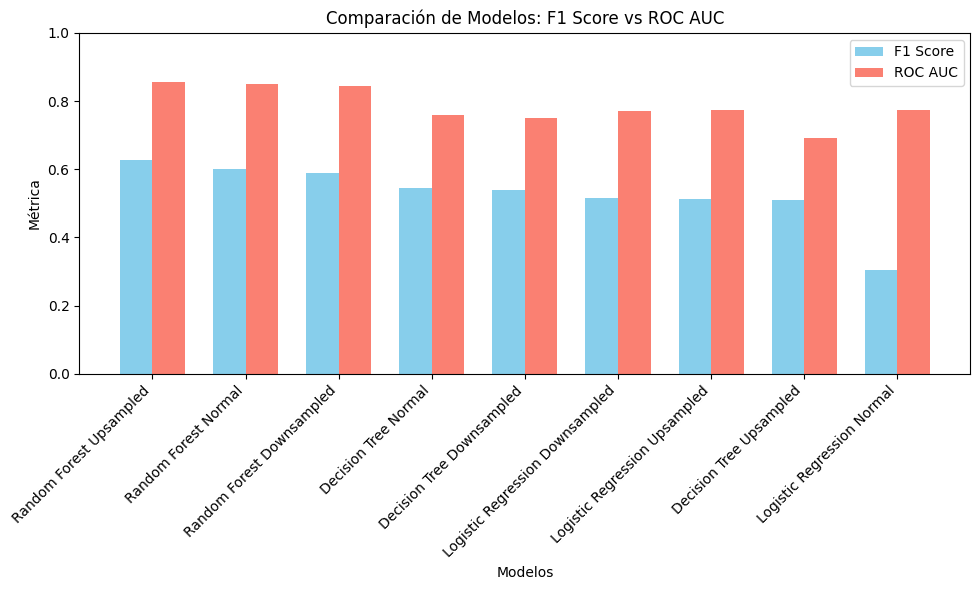

In [32]:
resultados = {
    'Modelo': [
        'Random Forest Normal', 'Random Forest Downsampled', 'Random Forest Upsampled',
        'Logistic Regression Normal', 'Logistic Regression Downsampled', 'Logistic Regression Upsampled',
        'Decision Tree Normal', 'Decision Tree Downsampled', 'Decision Tree Upsampled'
    ],
    'Accuracy': [
        0.872, 0.789, 0.838,
        0.808, 0.731, 0.736,
        0.834, 0.740, 0.801
    ],
    'Precision': [
        0.821, 0.489, 0.589,
        0.583, 0.407, 0.410,
        0.613, 0.421, 0.511
    ],
    'Recall': [
        0.474, 0.742, 0.668,
        0.206, 0.708, 0.683,
        0.491, 0.744, 0.511
    ],
    'F1 Score': [
        0.601, 0.589, 0.626,
        0.305, 0.517, 0.512,
        0.546, 0.538, 0.511
    ],
    'ROC AUC': [
        0.850, 0.843, 0.856,
        0.775, 0.771, 0.775,
        0.759, 0.749, 0.693
    ]
}

# Convertir a DataFrame
df_comparacion = pd.DataFrame(resultados)

# Ordenar por F1 Score descendente
df_comparacion = df_comparacion.sort_values(by='F1 Score', ascending=False)

# Mostrar la tabla comparativa
print(df_comparacion)

# --- Opcional: gráfico de F1 Score y ROC AUC ---
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(df_comparacion))

plt.bar(index, df_comparacion['F1 Score'], bar_width, label='F1 Score', color='skyblue')
plt.bar([i + bar_width for i in index], df_comparacion['ROC AUC'], bar_width, label='ROC AUC', color='salmon')

plt.xlabel('Modelos')
plt.ylabel('Métrica')
plt.title('Comparación de Modelos: F1 Score vs ROC AUC')
plt.xticks([i + bar_width/2 for i in index], df_comparacion['Modelo'], rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

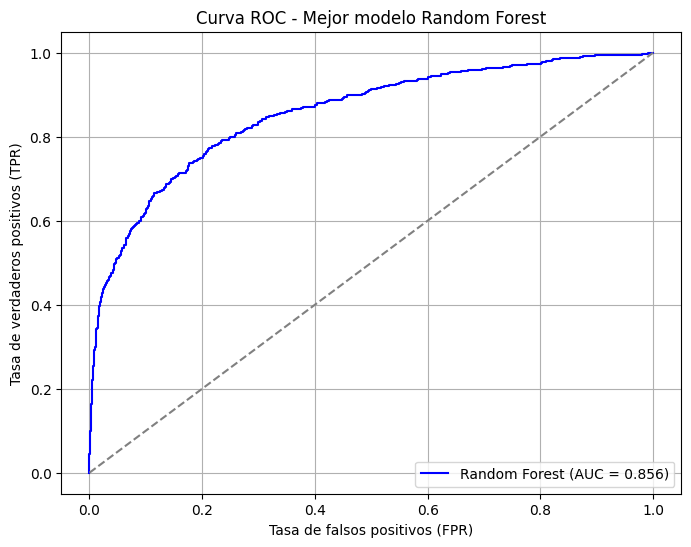

In [39]:

fpr, tpr, thresholds = roc_curve(target_valid, best_proba_fin)

# Grafica Ccurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Mejor modelo Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


El modelo Random Forest, configurado con n_estimators = 80 y max_depth = 10, demostró un desempeño sólido en la clasificación del conjunto de validación. La curva ROC evidencia una adecuada capacidad de discriminación entre las clases, con un área bajo la curva (AUC = 0.856) que indica un rendimiento muy bueno del modelo. Este resultado sugiere que el clasificador logra un equilibrio apropi

ado entre la tasa de verdaderos positivos y la tasa de falsos positivos, permitiendo una identificación confiable de las instancias positivas. En conjunto, los valores obtenidos de accuracy (0.872), precision (0.821), recall (0.474) y F1 score (0.601), junto con el AUC, confirman que el modelo Random Forest presenta un desempeño consistente y adecuado para el problema analizado, siendo una alternativa robusta para la tarea de clasificación bajo las condiciones evaluadas.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Entrenaste correctamente los modelos teniendo en cuenta el desequilibrio de clases. Ademeas usas diferentes sets de hiperparámetros para elegir los que mejor se ajustaran a los datos.

Solamente te recomiendo complementar el análisis con la gráfica ROC para evaluar el rendimiento del modelo. Este tipo de visualización permite comparar de forma efectiva distintos clasificadores y elegir el más adecuado.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Tras un análisis exhaustivo de los distintos modelos evaluados, se presentan las siguientes conclusiones fundamentadas en las métricas de desempeño F1 Score y ROC AUC:

- El modelo **Random Forest con sobremuestreo (upsampling)** demostró ser el más efectivo, alcanzando el valor más alto de F1 Score (0.626) y ROC AUC (0.856). Esto refleja un equilibrio adecuado entre precisión y exhaustividad (recall), así como una excelente capacidad discriminativa.

- El **Random Forest en su configuración original (sin ajuste de desequilibrio)** mostró un desempeño robusto con un F1 Score de 0.601 y un ROC AUC de 0.850, aunque con menor sensibilidad para la detección de clientes que abandonan la entidad.

- Los modelos basados en **submuestreo (downsampling)** mejoraron la sensibilidad, pero a costa de una menor precisión y exactitud, reflejando una reducción en el F1 Score en comparación con el modelo upsampled.

- Los modelos de **Regresión Logística**, aunque sencillos y rápidos de entrenar, mostraron un desempeño considerablemente inferior en ambas métricas, indicando que no son adecuados para capturar la complejidad y el desequilibrio presentes en los datos.

- Los **Árboles de Decisión** presentaron resultados intermedios, sin lograr superar a los modelos de Random Forest, evidenciando la ventaja de los métodos de ensamblado para mejorar la estabilidad y la capacidad predictiva.

En conclusión, el modelo **Random Forest con sobremuestreo** es el más apropiado para abordar la predicción de la pérdida de clientes en Beta Bank, debido a su mejor desempeño integral y equilibrio entre métricas clave. Este enfoque es coherente con el objetivo del proyecto, que prioriza la maximización del F1 Score sin perder de vista la capacidad de discriminación del modelo. La selección del modelo se realizó mediante un riguroso proceso de validación con conjuntos de entrenamiento y validación, garantizando la robustez y generalización del resultado obtenido.